In [1]:
from acquire import acquire_zillow_data
from prepare import missing_rows, drop_missing_columns, drop_selected_columns, zillow_dummies, zillow_split, zillow_scaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Zillow Clustering Project

## Acquire

Using the acquire_zillow_data function in my acqiure.py file we can get a dataframe of all 2017 properties.

In [2]:
df = acquire_zillow_data()

In [3]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


### Acquire Takeaways  
* There are a lot of null values and many columns to either drop or fill.

## Prepare

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77580 non-null  int64  
 1   typeconstructiontypeid        223 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77580 non-null  float64
 4   heatingorsystemtypeid         49572 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      207 non-null    float64
 7   airconditioningtypeid         25007 non-null  float64
 8   id                            77580 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77580 non-null  float64
 11  bedroomcnt                    77580 non-null  float64
 12  buildingqualitytypeid         49810 non-null  float64
 13  c

In [5]:
missing_row_count = missing_rows(df)
missing_row_count

,num_rows_missing,pct_rows_missing
parcelid,0,0.000000
typeconstructiontypeid,77357,99.712555
storytypeid,77530,99.935550
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,28008,36.102088
...,...,...
buildingclassdesc,77565,99.980665
heatingorsystemdesc,28008,36.102088
propertylandusedesc,0,0.000000
storydesc,77530,99.935550


In [6]:
df = drop_missing_columns(df)

In [7]:
df.head()

,parcelid,propertylandusetypeid,heatingorsystemtypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,14297519,261.0,NaN,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,NaN,Single Family Residential
1,17052889,261.0,NaN,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,NaN,Single Family Residential
2,14186244,261.0,NaN,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,NaN,Single Family Residential
3,12177905,261.0,2.0,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Central,Single Family Residential
4,10887214,266.0,2.0,1970746,3.0,3.0,8.0,3.0,1312.0,1312.0,...,119407.0,2016.0,45726.0,1533.89,6.037124e+13,4,0.006940,2017-01-01,Central,Condominium


In [8]:
df.shape

(77580, 35)

In [9]:
sqft_columns_diff = (df.finishedsquarefeet12 != df.calculatedfinishedsquarefeet).sum()
bathroomcnt_diff = (df.calculatedbathnbr != df.bathroomcnt).sum()
fullbathcnt_diff = (df.fullbathcnt != df.bathroomcnt).sum()

print(f'# of different values between finishedsquarefeet12 and calculatedfinishedsquarefeet: {sqft_columns_diff}')
print(f'# of different values between calculatedbathnbr and bathroomcnt: {bathroomcnt_diff}')
print(f'# of different values between fullbathcnt and bathroomcnt: {fullbathcnt_diff}')

# of different values between finishedsquarefeet12 and calculatedfinishedsquarefeet: 3656
# of different values between calculatedbathnbr and bathroomcnt: 616
# of different values between fullbathcnt and bathroomcnt: 10722


calculatedbathnbr seem to be very similar. The finishedsquarefeet12 also has a very similar set of values. Fullbathcnt has too many different values to comfortably drop however the other two columns will be dropped.

In [10]:
df.nunique()

parcelid                        77381
propertylandusetypeid              13
heatingorsystemtypeid              10
id                              77381
bathroomcnt                        22
bedroomcnt                         16
buildingqualitytypeid              12
calculatedbathnbr                  21
calculatedfinishedsquarefeet     4972
finishedsquarefeet12             4868
fips                                3
fullbathcnt                        13
latitude                        64038
longitude                       62461
lotsizesquarefeet               18848
propertycountylandusecode          75
propertyzoningdesc               1907
rawcensustractandblock          39191
regionidcity                      175
regionidcounty                      3
regionidzip                       389
roomcnt                            16
unitcnt                             8
yearbuilt                         136
structuretaxvaluedollarcnt      50430
taxvaluedollarcnt               50949
assessmentye

These columns are categorical and contain more than 10 unique values. They will be dropped because encoding them and using them as features would be both computationally expensive as well as add a lot of noise to the data.  
* propertylandusetypeid
* buildingqualitytypeid
* propertycountylandusecode
* propertyzoningdesc
* regionidcity
* rawcensustractandblock
* censustractandblock
* regionidzip
* id
* parcelid
* transactiondate
* latitude
* longitude
* heatingorsystemtypeid

This column has only one unique value and thus is useless for distinctions:  
* assessmentyear

Will be using fips to indentify county so I will be dropping this columns as well.
* regionidcounty

In [11]:
df = drop_selected_columns(df)
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,roomcnt,taxvaluedollarcnt,taxamount,logerror
0,3.5,4.0,3100.0,6059.0,4506.0,0.0,1023282.0,11013.72,0.025595
1,1.0,2.0,1465.0,6111.0,12647.0,5.0,464000.0,5672.48,0.055619
2,2.0,3.0,1243.0,6059.0,8432.0,6.0,564778.0,6488.30,0.005383
3,3.0,4.0,2376.0,6037.0,13038.0,0.0,145143.0,1777.51,-0.103410
4,3.0,3.0,1312.0,6037.0,278581.0,0.0,119407.0,1533.89,0.006940


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   77580 non-null  float64
 1   bedroomcnt                    77580 non-null  float64
 2   calculatedfinishedsquarefeet  77379 non-null  float64
 3   fips                          77580 non-null  float64
 4   lotsizesquarefeet             69322 non-null  float64
 5   roomcnt                       77580 non-null  float64
 6   taxvaluedollarcnt             77579 non-null  float64
 7   taxamount                     77575 non-null  float64
 8   logerror                      77580 non-null  float64
dtypes: float64(9)
memory usage: 5.3 MB


In [13]:
missing_rows_df = missing_rows(df)
total_pct_missing_rows = missing_rows_df.pct_rows_missing.sum()

In [14]:
print(f'Missing Row Percent: {total_pct_missing_rows}%')

Missing Row Percent: 10.911317349832432%


The remaining nulls make up ~11% of the data. In the interest of time we will be dropping these rows.

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69201 entries, 0 to 77579
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   69201 non-null  float64
 1   bedroomcnt                    69201 non-null  float64
 2   calculatedfinishedsquarefeet  69201 non-null  float64
 3   fips                          69201 non-null  float64
 4   lotsizesquarefeet             69201 non-null  float64
 5   roomcnt                       69201 non-null  float64
 6   taxvaluedollarcnt             69201 non-null  float64
 7   taxamount                     69201 non-null  float64
 8   logerror                      69201 non-null  float64
dtypes: float64(9)
memory usage: 5.3 MB


In [17]:
df.nunique()

bathroomcnt                        21
bedroomcnt                         15
calculatedfinishedsquarefeet     4936
fips                                3
lotsizesquarefeet               18806
roomcnt                            16
taxvaluedollarcnt               47209
taxamount                       66407
logerror                        68744
dtype: int64

In [18]:
df = zillow_dummies(df)

In [19]:
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,roomcnt,taxvaluedollarcnt,taxamount,logerror,fips_6037,fips_6059,fips_6111
0,3.5,4.0,3100.0,6059.0,4506.0,0.0,1023282.0,11013.72,0.025595,0,1,0
1,1.0,2.0,1465.0,6111.0,12647.0,5.0,464000.0,5672.48,0.055619,0,0,1
2,2.0,3.0,1243.0,6059.0,8432.0,6.0,564778.0,6488.30,0.005383,0,1,0
3,3.0,4.0,2376.0,6037.0,13038.0,0.0,145143.0,1777.51,-0.103410,1,0,0
4,3.0,3.0,1312.0,6037.0,278581.0,0.0,119407.0,1533.89,0.006940,1,0,0


In [20]:
df['roomcnt'] = np.where(df['roomcnt'] == 0.0, (df.bathroomcnt + df.bedroomcnt), df['roomcnt'])

In [21]:
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,roomcnt,taxvaluedollarcnt,taxamount,logerror,fips_6037,fips_6059,fips_6111
0,3.5,4.0,3100.0,6059.0,4506.0,7.5,1023282.0,11013.72,0.025595,0,1,0
1,1.0,2.0,1465.0,6111.0,12647.0,5.0,464000.0,5672.48,0.055619,0,0,1
2,2.0,3.0,1243.0,6059.0,8432.0,6.0,564778.0,6488.30,0.005383,0,1,0
3,3.0,4.0,2376.0,6037.0,13038.0,7.0,145143.0,1777.51,-0.103410,1,0,0
4,3.0,3.0,1312.0,6037.0,278581.0,6.0,119407.0,1533.89,0.006940,1,0,0


### Splitting  
We will use our split function to split into train, validate, and test and then use the .shape method to show how many rows are in each dataframe.

In [117]:
train, validate, test = zillow_split(df)
train.shape, validate.shape, test.shape

((38752, 12), (16608, 12), (13841, 12))

### Outliers

### Scaling

In [118]:
train_scaled, validate_scaled, test_scaled = zillow_scaler(train, validate, test)
train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,roomcnt,taxvaluedollarcnt,taxamount,logerror,fips_6037,fips_6059,fips_6111
30994,0.153846,0.1875,0.046145,6037.0,0.008575,0.208333,0.005118,0.005795,-0.161035,1,0,0
25639,0.230769,0.3125,0.108344,6059.0,0.001086,0.375000,0.023851,0.022167,0.003467,0,1,0
65786,0.153846,0.1250,0.058851,6111.0,0.000863,0.166667,0.017854,0.019021,0.006034,0,0,1
20824,0.230769,0.3125,0.101922,6037.0,0.000954,0.333333,0.019628,0.023167,0.025436,1,0,0
66654,0.230769,0.2500,0.114582,6037.0,0.002657,0.291667,0.035876,0.038816,0.947245,1,0,0


In [37]:
X = train_scaled[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'roomcnt', 'taxvaluedollarcnt', 'taxamount']]
y = train['logerror']
lm = LinearRegression()
rfe_ = RFE(lm, 1)
rfe_.fit(X, y)
ranks = rfe_.ranking_
names = X.columns.tolist()
pd.DataFrame({'features': names, 'rank': ranks}).set_index('rank').sort_index()

,features
rank,
1,taxamount
2,taxvaluedollarcnt
3,calculatedfinishedsquarefeet
4,lotsizesquarefeet
5,bathroomcnt
6,roomcnt
7,bedroomcnt


We will be using four features, taxvaluedollarcnt, calculatedfinishedsquarefeet, lotsizesquarefeet, roomcnt.

In [119]:
train_scaled = train_scaled[['taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'roomcnt', 'logerror']]
validate_scaled = validate_scaled[['taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'roomcnt', 'logerror']]
test_scaled = test_scaled[['taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'roomcnt', 'logerror']]

train = train[['taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'roomcnt', 'logerror']]
validate = validate[['taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'roomcnt', 'logerror']]
test = test[['taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'roomcnt', 'logerror']]

In [120]:
train_scaled.head()

,taxvaluedollarcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,roomcnt,logerror
30994,0.005118,0.046145,0.008575,0.208333,-0.161035
25639,0.023851,0.108344,0.001086,0.375000,0.003467
65786,0.017854,0.058851,0.000863,0.166667,0.006034
20824,0.019628,0.101922,0.000954,0.333333,0.025436
66654,0.035876,0.114582,0.002657,0.291667,0.947245


In [121]:
train_scaled = train_scaled.rename(columns = {'taxvaluedollarcnt': 'property_tax_value', 'calculatedfinishedsquarefeet': 'total_square_feet', 'lotsizesquarefeet': 'lot_square_feet', 'roomcnt': 'room_count'})
validate_scaled = validate_scaled.rename(columns = {'taxvaluedollarcnt': 'property_tax_value', 'calculatedfinishedsquarefeet': 'total_square_feet', 'lotsizesquarefeet': 'lot_square_feet', 'roomcnt': 'room_count'})
test_scaled = test_scaled.rename(columns = {'taxvaluedollarcnt': 'property_tax_value', 'calculatedfinishedsquarefeet': 'total_square_feet', 'lotsizesquarefeet': 'lot_square_feet', 'roomcnt': 'room_count'})

train = train.rename(columns = {'taxvaluedollarcnt': 'property_tax_value', 'calculatedfinishedsquarefeet': 'total_square_feet', 'lotsizesquarefeet': 'lot_square_feet', 'roomcnt': 'room_count'})
validate = validate.rename(columns = {'taxvaluedollarcnt': 'property_tax_value', 'calculatedfinishedsquarefeet': 'total_square_feet', 'lotsizesquarefeet': 'lot_square_feet', 'roomcnt': 'room_count'})
test = test.rename(columns = {'taxvaluedollarcnt': 'property_tax_value', 'calculatedfinishedsquarefeet': 'total_square_feet', 'lotsizesquarefeet': 'lot_square_feet', 'roomcnt': 'room_count'})

train.head()

,property_tax_value,total_square_feet,lot_square_feet,room_count,logerror
30994,133147.0,1134.0,60009.0,5.0,-0.161035
25639,608536.0,2490.0,7808.0,9.0,0.003467
65786,456354.0,1411.0,6250.0,4.0,0.006034
20824,501370.0,2350.0,6886.0,8.0,0.025436
66654,913724.0,2626.0,18760.0,7.0,0.947245


## Prepare Takeaways

* Dropped all columns that were missing 40% or more of their values
* Dropped duplicate columns
* Dropped categorical columns with many unique values
* Dropped columns with only one unique value
* Dropped redundant columns  


* Dropped rows with missing values.
* Split Data into train, validate, test
* Scaled numeric variables.  


* Variables to move forwards into exploration:
    * room_count
    * lot_square_feet
    * total_square_feet
    * property_tax_value

## Explore

### Total Square Feet

Text(0, 0.5, 'Log Error')

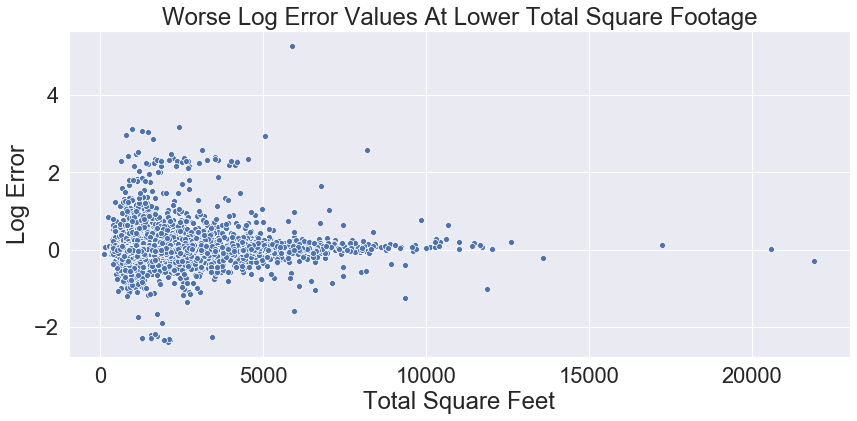

In [56]:
sns.set(rc={'figure.figsize':(14,6)})
sns.set(font_scale=2)
sns.scatterplot(x='total_square_feet', y='logerror', data = train)
plt.title('Worse Log Error Values At Lower Total Square Footage')
plt.xlabel('Total Square Feet')
plt.ylabel('Log Error')

The higher the total_square_feet the better the log error is.

### Hypothesis Test - Total Square Feet

$H_0$: Log error of properties with below average total square feet is equal to the log error of properties with average or above total square feet.  
$H_a$: Log error of properties with below average total square feet is not equal to the log error of properties with average or above total square feet.  
Alpha: 0.05

In [57]:
avg_total_square_feet = train.total_square_feet.mean()

In [62]:
x1 = train[train.total_square_feet < avg_total_square_feet].logerror
x2 = train[train.total_square_feet >= avg_total_square_feet].logerror

t, p = stats.ttest_ind(x1, x2)

print(f'P-Value: {p}')

P-Value: 0.0003745465169178938


Because our p-value is less than our alpha(0.05) we reject our null hypothesis and can conclude that the log error is different whether or not you have a house with avg. or more total square footage.

### Room_Count

Text(0, 0.5, 'Log Error')

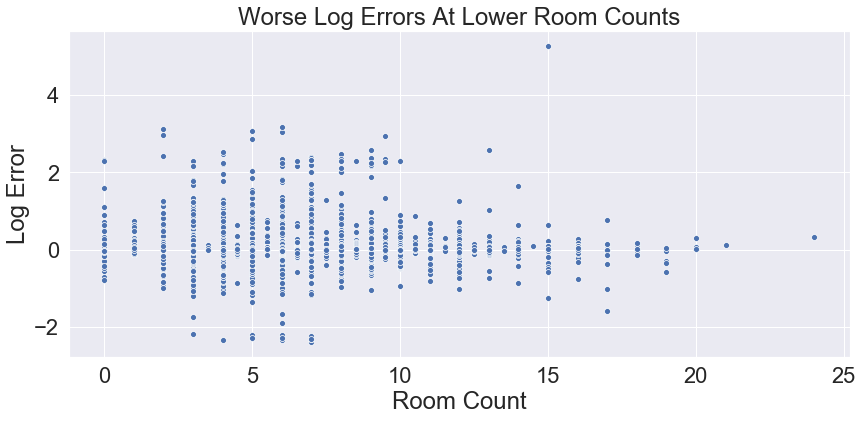

In [65]:
sns.scatterplot(x = 'room_count', y='logerror', data=train)
plt.title('Worse Log Errors At Lower Room Counts')
plt.xlabel('Room Count')
plt.ylabel('Log Error')

It seems the general trend is that the lower the room count the higher the log error.

### Hypothesis Test - Room Count

$H_0$: Log error of properties with below average room count is equal to the log error of properties with average or above room count.  
$H_a$: Log error of properties with below average room count is not equal to the log error of properties with average or above room count.  
alpha: 0.05

In [67]:
avg_room_count = train.room_count.mean()

x1 = train[train.room_count < avg_room_count].logerror
x2 = train[train.room_count >= avg_room_count].logerror

t, p = stats.ttest_ind(x1, x2)

print(f'P-Value: {p}')

P-Value: 0.0002705470395621311


Because our p-value is lower than our alpha we reject the null hypothesis and conclude that the log error of properties with average or higher room count is not the same as those with below average room count.

Text(0, 0.5, 'Log Error')

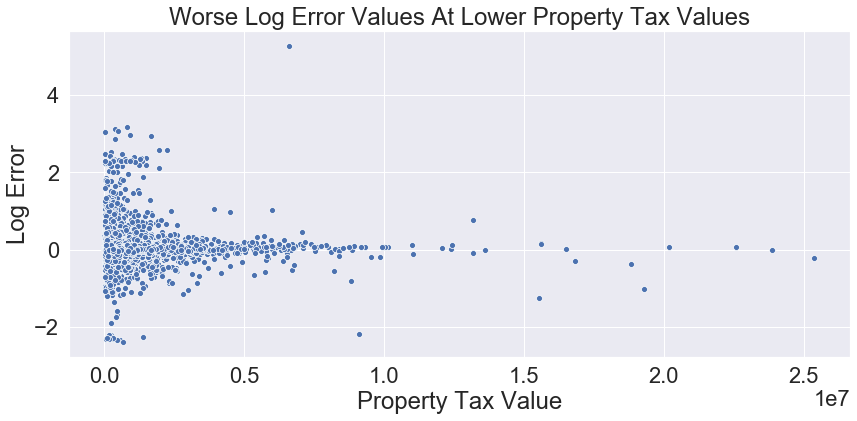

In [69]:
sns.scatterplot(x='property_tax_value', y='logerror', data = train)
plt.title('Worse Log Error Values At Lower Property Tax Values')
plt.xlabel('Property Tax Value')
plt.ylabel('Log Error')

Text(0, 0.5, 'Log Error')

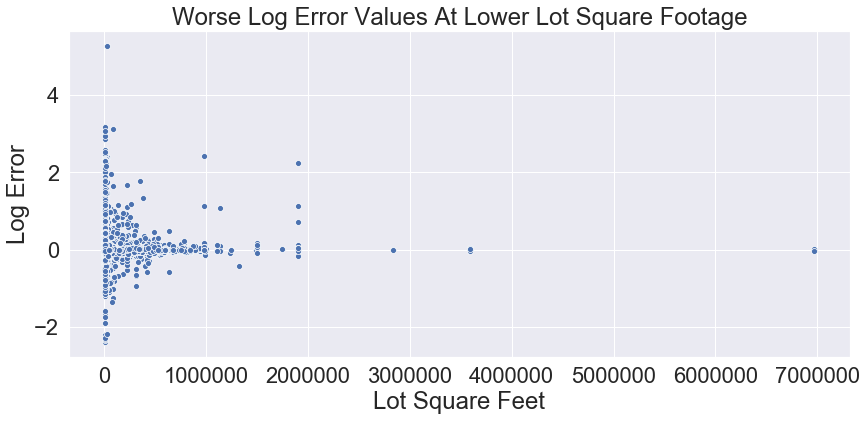

In [71]:
sns.scatterplot(x='lot_square_feet', y='logerror', data = train)
plt.title('Worse Log Error Values At Lower Lot Square Footage')
plt.xlabel('Lot Square Feet')
plt.ylabel('Log Error')

## Clustering

### Cluster Features: Total Square Feet & Property Tax Value

In [116]:
train_k1 = train.copy()

In [113]:
x_clustered1 = train_scaled[['total_square_feet', 'property_tax_value']]

First I'm going to use the elbow method to figure out which value of k I should use.

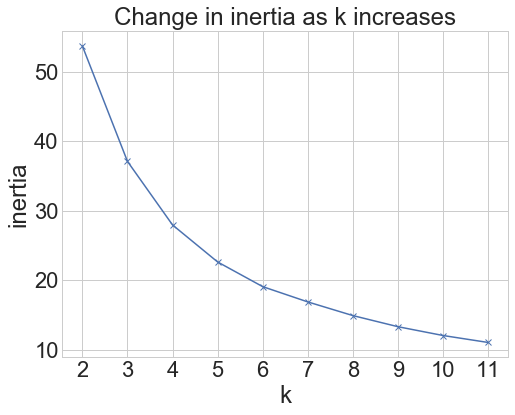

In [74]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    pd.Series({k: KMeans(k).fit(x_clustered1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

It seems like the best value for k is 4.

In [137]:
kmeans1 = KMeans(n_clusters = 4)

kmeans1.fit(x_clustered1)
kmeans1.predict(x_clustered1)
train_k1['clustered'] = kmeans1.predict(x_clustered1)

In [138]:
train_k1.sample(10)

,property_tax_value,total_square_feet,lot_square_feet,room_count,logerror,clustered
13720,293598.0,1616.0,29576.0,5.0,-0.012245,0
2115,311974.0,2099.0,21806.0,8.0,-0.017098,2
75729,660194.0,2080.0,7681.0,8.0,-0.372195,2
57659,492946.0,3310.0,5330.0,9.0,0.096568,3
21625,641997.0,2170.0,2913.0,6.5,0.001046,2
17800,929823.0,1835.0,122942.0,5.0,-0.001120,2
56386,451786.0,1778.0,6602.0,5.0,0.023548,2
41850,445000.0,1418.0,6925.0,5.0,-0.043678,0
50535,988452.0,2749.0,25982.0,7.0,0.421198,2
1734,527086.0,1445.0,3478.0,6.0,0.073819,0


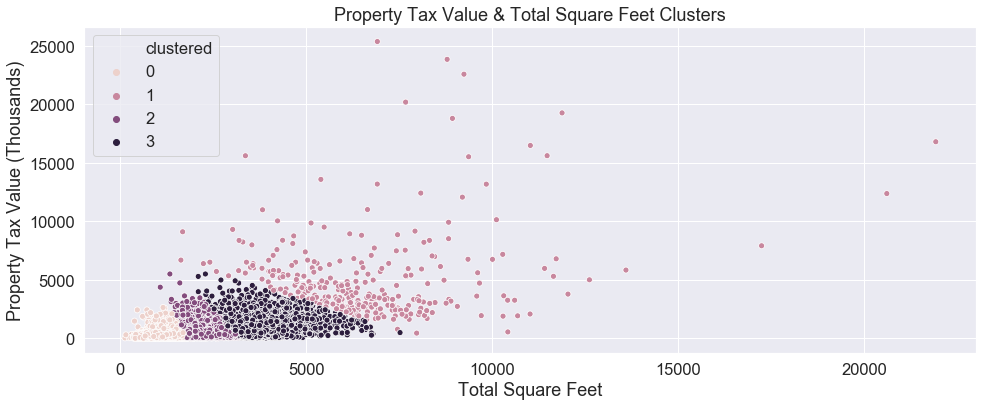

In [139]:
sns.set(rc={'figure.figsize':(14,6)})
sns.set(font_scale=1.5)
sns.scatterplot(x='total_square_feet', y=train_k1['property_tax_value'] / 1000, hue='clustered', data = train_k1)
plt.title('Property Tax Value & Total Square Feet Clusters')
plt.xlabel('Total Square Feet')
plt.ylabel('Property Tax Value (Thousands)')
plt.tight_layout()

**Cluster 0:** The smallest/least valued properties.  
**Cluster 1:** Lower-medium sized properties that still are mostly lower valued.  
**Cluster 2:** Medium-larger sized properties that are still mostly lower valued.  
**Cluster 3:** Erratic, numerous outliers. Either higher than normal property value or higher than normal property size.

## Cluster Hypothesis Test

$H_0$: There is no difference between the average log error of clusters 0, 1, 2, and 3.  
$H_a$: There is a difference between the average log error of clusters 0, 1, 2, and 3.

In [151]:
cluster_0 = train_k1[train_k1.clustered == 0].logerror
cluster_1 = train_k1[train_k1.clustered == 1].logerror
cluster_2 = train_k1[train_k1.clustered == 2].logerror
cluster_3 = train_k1[train_k1.clustered == 3].logerror

In [152]:
f, p = stats.f_oneway(cluster_0, cluster_1, cluster_2, cluster_3)

In [153]:
print('alpha: .05')
print(f'f: {f}')
print(f'P-Value: {p}')

alpha: .05
f: 10.254252632098698
P-Value: 9.591273127291616e-07


Our p value is lower than our alpha of .05 which means that the average log errors are different between the clusters. We may choose to use this when it comes to modeling.

### Cluster Features: Total Square Feet & Room Count

In [133]:
train_k2 = train.copy()
x_clustered2 = train_scaled[['total_square_feet', 'room_count']]

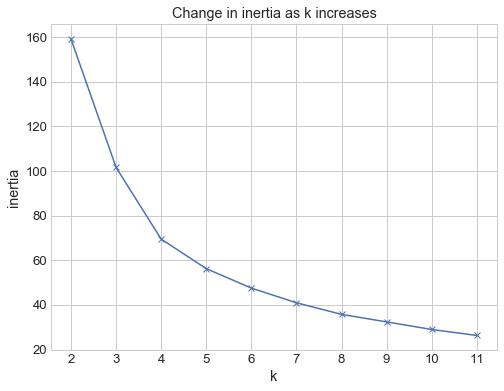

In [115]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    pd.Series({k: KMeans(k).fit(x_clustered2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

We will once again be using 4 for our k value.

In [141]:
kmeans2 = KMeans(n_clusters = 4)

kmeans2.fit(x_clustered2)
kmeans2.predict(x_clustered2)
train_k2['clustered'] = kmeans2.predict(x_clustered2)
train_k2.sample(10)

,property_tax_value,total_square_feet,lot_square_feet,room_count,logerror,clustered
35030,3187000.0,3762.0,7653.0,9.0,-0.090070,2
55268,47416.0,1120.0,7210.0,6.0,0.241703,0
68361,342514.0,2826.0,23650.0,8.0,0.032420,3
58265,375587.0,3024.0,5704.0,7.0,0.362212,3
8667,14577.0,742.0,6850.0,4.0,0.021454,1
42557,247357.0,1380.0,48336.0,5.0,0.037190,0
35401,297077.0,2198.0,10900.0,8.0,-0.014807,3
34249,872099.0,3169.0,10824.0,8.0,-0.077827,3
54252,197871.0,1236.0,11285.0,5.0,-0.034422,0
64461,68460.0,1356.0,6000.0,6.0,0.055480,0


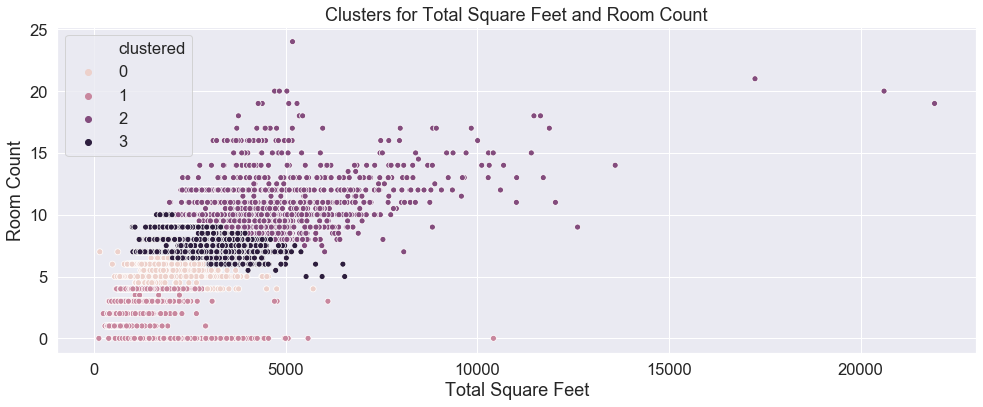

In [149]:
sns.set(rc={'figure.figsize':(14,6)})
sns.set(font_scale=1.5)
sns.scatterplot(x='total_square_feet', y='room_count', hue='clustered', data = train_k2)
plt.title('Clusters for Total Square Feet and Room Count')
plt.xlabel('Total Square Feet')
plt.ylabel('Room Count')
plt.tight_layout()

**Cluster 0:** More rooms than Cluster 1 but about the same square footage.  
**Cluster 1:** The lowest number of rooms and smallest square footage.  
**Cluster 2:** The second largest and second highest number of rooms.  
**Cluster 3:** The largest properties with the highest room counts.

## Cluster Hypothesis Test

$H_0$: There is no difference between the average log error of clusters 0, 1, 2, and 3.  
$H_a$: There is a difference between the average log error of clusters 0, 1, 2, and 3.

In [150]:
cluster_0 = train_k2[train_k2.clustered == 0].logerror
cluster_1 = train_k2[train_k2.clustered == 1].logerror
cluster_2 = train_k2[train_k2.clustered == 2].logerror
cluster_3 = train_k2[train_k2.clustered == 3].logerror

f, p = stats.f_oneway(cluster_0, cluster_1, cluster_2, cluster_3)

print('alpha: 0.05')
print(f'P-Value: {p}')

alpha: 0.05
P-Value: 8.660324041996956e-09


Our p value is lower than our alpha of .05 which means that the average log errors are different between the clusters. We may choose to use this when it comes to modeling. This also performed better than the last hypothesis test.

# Modeling

Now we start creating models that will attempt to predict the log error associated with each property.

### Baseline  
The baseline will be the train samples log error.

In [157]:
y_train = train[['logerror']]
y_train['baseline_pred'] = y_train.logerror.mean()

In [158]:
y_train.head()

,logerror,baseline_pred
30994,-0.161035,0.016961
25639,0.003467,0.016961
65786,0.006034,0.016961
20824,0.025436,0.016961
66654,0.947245,0.016961


In [159]:
rmse_baseline = mean_squared_error(y_train.logerror, y_train.baseline_pred)**(1/2)

In [160]:
print(f'Baseline RMSE: {rmse_baseline}')

Baseline RMSE: 0.1668251137508384


### Model 1 (All Features Including Clusters)  
**Features:**  
* total_square_feet
* property_tax_value
* room_count
* lot_square_feet
* Room Count Clusters
    * room_count
    * total_square_feet
    * num clusters = 4

**Model Type:** Linear Regression

In [168]:
train_m1 = train.copy()
x_clustered1 = train_scaled[['total_square_feet', 'room_count']]

kmeans1 = KMeans(n_clusters = 4)

kmeans1.fit(x_clustered1)
kmeans1.predict(x_clustered1)
train_m1['clusters'] = kmeans1.predict(x_clustered1)

In [172]:
dummy_df = pd.get_dummies(train_m1['clusters'], drop_first=False)
dummy_df = dummy_df.rename(columns={0: 'Cluster_0', 1: 'Cluster_1', 2: 'Cluster_2', 3: 'Cluster_3'})
dummy_df.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3
30994,1,0,0,0
25639,0,0,0,1
65786,0,1,0,0
20824,0,0,0,1
66654,0,0,0,1


In [173]:
train_m1 = pd.concat([train_m1, dummy_df], axis=1)

In [175]:
train_m1 = train_m1.drop(columns='clusters')

In [177]:
train_m1.head()

,property_tax_value,total_square_feet,lot_square_feet,room_count,logerror,Cluster_0,Cluster_1,Cluster_2,Cluster_3
30994,133147.0,1134.0,60009.0,5.0,-0.161035,1,0,0,0
25639,608536.0,2490.0,7808.0,9.0,0.003467,0,0,0,1
65786,456354.0,1411.0,6250.0,4.0,0.006034,0,1,0,0
20824,501370.0,2350.0,6886.0,8.0,0.025436,0,0,0,1
66654,913724.0,2626.0,18760.0,7.0,0.947245,0,0,0,1


In [182]:
X_train = train_m1.drop(columns='logerror')
y_train = train[['logerror']]

In [183]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
y_train['model_1_pred'] = lm.predict(X_train)

In [184]:
y_train.head()

,logerror,model_one_pred
30994,-0.161035,0.014970
25639,0.003467,0.016908
65786,0.006034,0.013050
20824,0.025436,0.018803
66654,0.947245,0.019129


In [185]:
rmse_m1 = mean_squared_error(y_train.logerror, y_train.model_1_pred)**(1/2)
print(f'RMSE for Model 1 Linear Regression: {rmse_m1}')

RMSE for Model 1 Linear Regression: 0.16661838936540616


This model is ever so slightly better than the baseline by .0002

### Model 2 (All Features No Clusters)

In [193]:
X_train2 = train_scaled.drop(columns='logerror')
y_train2 = train[['logerror']]

In [194]:
lm2 = LinearRegression(normalize=True)
lm2.fit(X_train2, y_train2)
y_train2['model_2_pred'] = lm2.predict(X_train2)

In [195]:
y_train2.head()

,logerror,model_two_pred
30994,-0.161035,0.014465
25639,0.003467,0.020319
65786,0.006034,0.013378
20824,0.025436,0.020464
66654,0.947245,0.019973


In [196]:
rmse_m2 = mean_squared_error(y_train2.logerror, y_train2.model_2_pred)**(1/2)
print(f'RMSE for Model 2 Linear Regression: {rmse_m2}')

RMSE for Model 2 Linear Regression: 0.16664409173293354


Model 2 also performed better than the baseline but did basically the same as model 1.

### Model 3 (All Features No Clusters Lasso Lars)

In [198]:
X_train3 = train_scaled.drop(columns='logerror')
y_train3 = train[['logerror']]

lars = LassoLars(alpha=1.0)
lars.fit(X_train3, y_train3.logerror)
y_train3['model_3_pred'] = lars.predict(X_train3)

rmse_m3 = mean_squared_error(y_train3.logerror, y_train3.model_3_pred)**(1/2)
print(f'RMSE for Model 3 Lasso Lars: {rmse_m3}')

RMSE for Model 3 Lasso Lars: 0.1668251137508384


After making these models we will be moving forwards into validation.

# Validation

### Model 1 Validation

In [199]:
validate_m1 = validate.copy()
x_clustered1 = validate_scaled[['total_square_feet', 'room_count']]

kmeans1 = KMeans(n_clusters = 4)

kmeans1.fit(x_clustered1)
kmeans1.predict(x_clustered1)
validate_m1['clusters'] = kmeans1.predict(x_clustered1)

In [201]:
dummy_df = pd.get_dummies(validate_m1['clusters'], drop_first=False)
dummy_df = dummy_df.rename(columns={0: 'Cluster_0', 1: 'Cluster_1', 2: 'Cluster_2', 3: 'Cluster_3'})

In [202]:
validate_m1 = pd.concat([validate_m1, dummy_df], axis=1)
validate_m1 = validate_m1.drop(columns='clusters')

In [203]:
X_validate = validate_m1.drop(columns='logerror')
y_validate = validate[['logerror']]

In [204]:
lm = LinearRegression(normalize=True)
lm.fit(X_validate, y_validate)
y_validate['model_1_pred'] = lm.predict(X_validate)

rmse_v1 = mean_squared_error(y_validate.logerror, y_validate.model_1_pred)**(1/2)
print(f'RMSE for Model 1 Linear Regression: {rmse_v1}')

RMSE for Model 1 Linear Regression: 0.17956665728569363


### Model 2 Validation

In [205]:
X_validate2 = validate_scaled.drop(columns='logerror')
y_validate2 = validate[['logerror']]

lm2 = LinearRegression(normalize=True)
lm2.fit(X_validate2, y_validate2)
y_validate2['model_2_pred'] = lm2.predict(X_validate2)

rmse_v2 = mean_squared_error(y_validate2.logerror, y_validate2.model_2_pred)**(1/2)
print(f'RMSE for Model 2 Linear Regression: {rmse_v2}')

RMSE for Model 2 Linear Regression: 0.1795993855308729


### Model 3 Validation

In [206]:
X_validate3 = validate_scaled.drop(columns='logerror')
y_validate3 = validate[['logerror']]

lars = LassoLars(alpha=1.0)
lars.fit(X_validate3, y_validate3.logerror)
y_validate3['model_3_pred'] = lars.predict(X_validate3)

rmse_m3 = mean_squared_error(y_validate3.logerror, y_validate3.model_3_pred)**(1/2)
print(f'RMSE for Model 3 Lasso Lars: {rmse_m3}')

RMSE for Model 3 Lasso Lars: 0.17981224568409765
